# ASTR 3750 Planets, Moons, and Rings

## Import Modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simulation (Impact Crater Saturation)

In [126]:
class Model:
    
    def Uniform(o):
        o.x = 500                   # Length of the planetary surface
        o.y = 500                   # Width  of the planetary surface
        o.con = 0                   # Condition for Uniform Craters Assumption '0'
        o.radius = [ ]
        o.crater = [ ]
        o.xarray = [ ]
        o.yarray = [ ]
        o.elapse = [ ]
        o.nannum = [ ]
        o.nanrat = [ ]
        o.namest = globals()
        o.s = [25, 50, 75, 95]
        o.a = np.zeros((o.y, o.x))
        
    def Notuniform(o):
        o.x = 500                   # Length of the planetary surface
        o.y = 500                   # Width  of the planetary surface
        o.con = 1                   # Condition for Non-uniform Craters Assumption '1'
        o.radius = [ ]              # Created for appending radius data for each loop
        o.crater = [ ]              # Created for appending number of craters through time
        o.xarray = [ ]              # Created for the x-coordinate of each crater
        o.yarray = [ ]              # Created for the y-coordinate of each crater
        o.elapse = [ ]              # Created for appending the elapsed time (in thousand of years or ka)
        o.nannum = [ ]              # Created for appending the number of 'damaged' points in the total 500*500 array
        o.nanrat = [ ]              # Created for appending the saturation data ("damaged" points/250,000)
        o.namest = globals()
        o.s = [25, 50, 75, 95]      # Saturation rates I need to focus on
        o.a = np.zeros((o.y, o.x))  # An crated array of 500*500 - with a number of 250,000 zeros

    def Simulation(o):
        counts = 0
        while True:
            while o.con == 0:                                 # For Uniform Craters Assumption '0'
                o.d = 10
                o.t = 'For Uniform Craters'
                break
            while o.con == 1:
                o.d = np.random.randint(10, 100, 1)[0]        # For Non-uniform Craters Assumption '1'
                o.t = 'For Non-uniform Craters'
                break
            counts += 1
            rand_x  = np.random.randint(0, o.x, 1)[0]         # Appending the randomnized x-coordinate
            rand_y  = np.random.randint(0, o.y, 1)[0]         # Appending the randomnized y-coordinate
            o.xarray.append(rand_x)
            o.yarray.append(rand_y)
            o.elapse.append(counts) 
            xrand_min = rand_x - 10         # Narrowing down the x min range
            yrand_min = rand_y - 10         # Narrowing down the y min range
            xrand_max = rand_x + 10         # Narrowing down the x max range
            yrand_max = rand_y + 10         # Narrowing down the y max range
            while  xrand_max >= o.x:
                xrand_max     = o.x         # Make >500 equal to 500  
                break 
            while  yrand_max >= o.y:
                yrand_max     = o.y         # Make >500 equal to 500
                break
            for rang_x in range(xrand_min, xrand_max):
                for rang_y in range(yrand_min, yrand_max):
                    while (rang_x-rand_x)**2+(rang_y-rand_y)**2 < (o.d/2)**2:
                        o.a[rang_x][rang_y] = np.nan
                        break
            destroyed = np.count_nonzero(np.isnan(o.a))
            saturated = (destroyed/(o.x*o.y))*100 
            o.nannum.append(destroyed)
            o.nanrat.append(saturated)
            o.radius.append(o.d*2)
            if saturated >= 95:
                break

    def Saturation(o):
        realcounts = 0
        for num in o.s:
            position = next(n for n, v in enumerate(o.nanrat) if v >= num)
            differen = [y - x for x, y in zip(o.nannum[:position], o.nannum[:position][1:])]
            o.namest['counts_%d' % num] = sum(each >= o.nannum[0]*0.15 for each in differen) # Calculate the difference for each damage points
            o.namest['xarray_%d' % num] = o.xarray[:position]    # Assign x-coordinate data                   
            o.namest['yarray_%d' % num] = o.yarray[:position]    # Assign y-coordinate data
            o.namest['elapse_%d' % num] = o.elapse[:position]    # Assign elapsed time data
            o.namest['radius_%d' % num] = o.radius[:position]    # Assign crater radius data
            if num == 95:
                for each in differen:
                    while each >= o.nannum[0]*0.15:                                
                        realcounts += 1
                        o.crater.append(realcounts)
                        break
                    else:
                        o.crater.append(o.crater[-1])

    def Craters(o):
        fig = plt.figure(figsize=(12, 12))
        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 3)
        ax4 = fig.add_subplot(2, 2, 4)
        ax1.set_xlim(o.x), ax1.set_ylim(o.y)
        ax2.set_xlim(o.x), ax2.set_ylim(o.y)
        ax3.set_xlim(o.x), ax3.set_ylim(o.y)
        ax4.set_xlim(o.x), ax4.set_ylim(o.y)
        ax1.scatter(xarray_25, yarray_25, 
                    c=elapse_25, s=radius_25, 
                    cmap=plt.cm.binary_r)
        ax2.scatter(xarray_50, yarray_50, 
                    c=elapse_50, s=radius_50, 
                    cmap=plt.cm.binary_r)
        ax3.scatter(xarray_75, yarray_75, 
                    c=elapse_75, s=radius_75, 
                    cmap=plt.cm.binary_r)
        ax4.scatter(xarray_95, yarray_95, 
                    c=elapse_95, s=radius_95,
                    cmap=plt.cm.binary_r)
        ax1.set_facecolor('k'), ax2.set_facecolor('k')
        ax3.set_facecolor('k'), ax4.set_facecolor('k')
        ax1.set_title('25 %', fontsize=14), ax2.set_title('50 %', fontsize=14)
        ax3.set_title('75 %', fontsize=14), ax4.set_title('95 %', fontsize=14)
        
    def Graphs(o):
        plt.figure(figsize=(12, 8))
        plt.title("Craters vs Elapsed Time " + o.t, fontsize=14)
        plt.xlabel("Time Elapsed (Thousands of Years)", fontsize=14)
        plt.ylabel("Number of Craters", fontsize=14)
        plt.plot(o.elapse[:-2], o.crater)
        
        print('-----------------------------------------------------')
        print("Time for 25% saturation (Thousands of Years): ", len(elapse_25))
        print("The number of craters evident on the surface: ", counts_25)
        print('-----------------------------------------------------')
        print("Time for 50% saturation (Thousands of Years): ", len(elapse_50))
        print("The number of craters evident on the surface: ", counts_50)
        print('-----------------------------------------------------')
        print("Time for 75% saturation (Thousands of Years): ", len(elapse_75))
        print("The number of craters evident on the surface: ", counts_75)
        print('-----------------------------------------------------')
        print("Time for 100% saturation (Thousands of Years): ", len(elapse_95))
        print("The number of craters evident on the surface: ", counts_95)
        print('-----------------------------------------------------')

-----------------------------------------------------
Time for 25% saturation (Thousands of Years):  1053
The number of craters evident on the surface:  1029
-----------------------------------------------------
Time for 50% saturation (Thousands of Years):  2497
The number of craters evident on the surface:  2328
-----------------------------------------------------
Time for 75% saturation (Thousands of Years):  5007
The number of craters evident on the surface:  4007
-----------------------------------------------------
Time for 100% saturation (Thousands of Years):  10792
The number of craters evident on the surface:  5626
-----------------------------------------------------


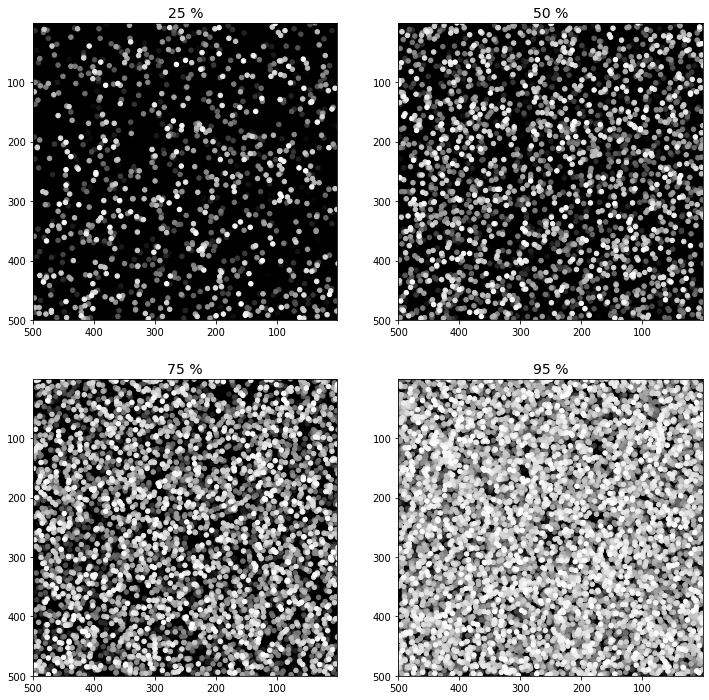

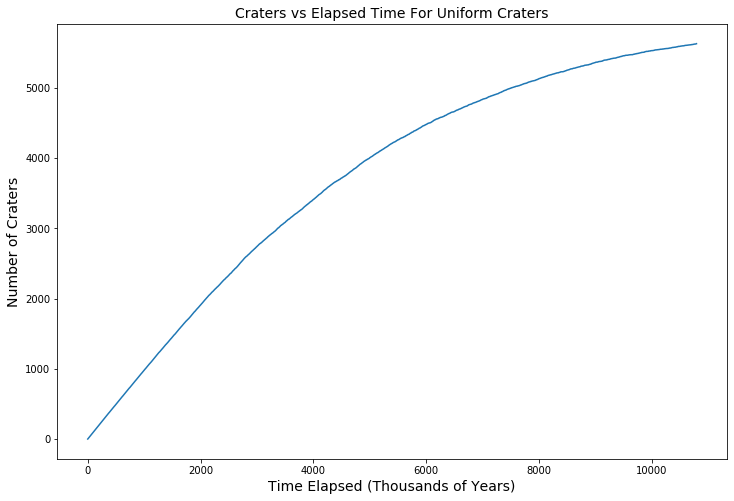

In [127]:
if __name__ == "__main__": 
    model = Model()
    model.Uniform()
    model.Simulation()
    model.Saturation()
    model.Craters() 
    model.Graphs() 

-----------------------------------------------------
Time for 25% saturation (Thousands of Years):  203
The number of craters evident on the surface:  192
-----------------------------------------------------
Time for 50% saturation (Thousands of Years):  472
The number of craters evident on the surface:  429
-----------------------------------------------------
Time for 75% saturation (Thousands of Years):  939
The number of craters evident on the surface:  742
-----------------------------------------------------
Time for 100% saturation (Thousands of Years):  2115
The number of craters evident on the surface:  1042
-----------------------------------------------------


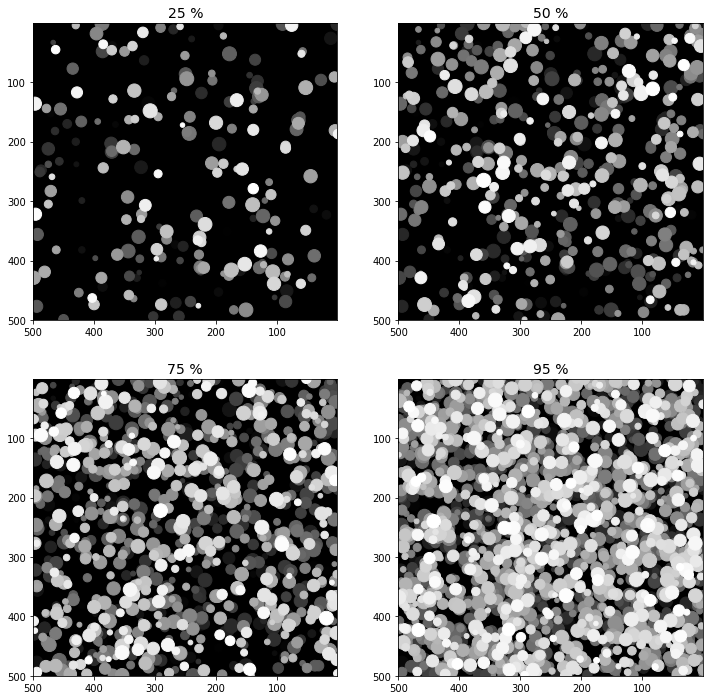

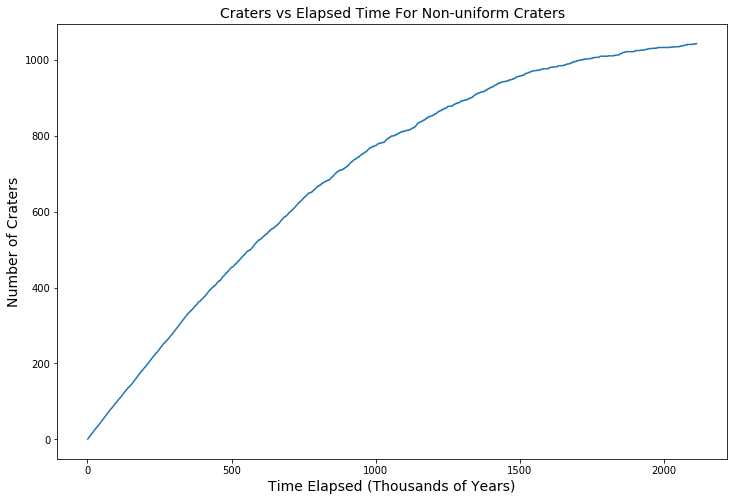

In [128]:
if __name__ == "__main__": 
    model = Model()
    model.Notuniform()
    model.Simulation()
    model.Saturation()
    model.Craters() 
    model.Graphs() 